# Question for M5(EDA)
5th Makridakis forecasting competitions (M5)  
2020-03-11  
damien park
## version

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 500)

In [ ]:
train = pd.read_csv("../input/m5-forecasting-accuracy/sales_train_validation.csv")
calendar = pd.read_csv("../input/m5-forecasting-accuracy/calendar.csv")
sell = pd.read_csv("../input/m5-forecasting-accuracy/sell_prices.csv")
sample = pd.read_csv("../input/m5-forecasting-accuracy/sample_submission.csv")

---
# Column description
예측해야하는 상품의 종류는 30490개(id의 unique값과 동일), 그러나 submission시에는 그의 2배인 60980개를 예측해야한다.  
이는 id가 예측기간에 따라 validation과 evaluation로 나눠져 있기 때문이다.  
결국 모든 상품에 대해서 첫번째 28일 후 예측(validation)과 그 예측의 28일 후(evaluation)를 예측해야한다.  
각 데이터 소스마다 날짜 표기가 조금씩 다름, 하나로 통일 필요성이 있다.  

The item to be predicted is 30490 (equivalent to the unique value of id), but when we submit, we should 60980 items, which is twice that of predicted item.  
That's because the id is made up by two part (confirmation and evaluation).  
Eventually, we need to predict the first 28 days after and 28 days after the first prediction for all products.  
Date notation is slightly different for each data source. So we have to unify date notaion.

## train
|index|source|column|type|description|exam|
|---|---|---|---|---|---|
|0|train|id|str|id(item_id+store_id)|HOBBIES_1_001_CA_1_validation|
|1|train|item_id|str|item id|HOBBIES_1_001|
|2|train|dept_id|str|depatment id by category<br>(FOOD_1, FOOD_2, FOOD_3, HOBBIES_1, HOBBIES_2, HOUSEHOLD_1, HOUSEHOLD_2)|HOBBIES_1|
|3|train|cat_id|str|category id, (FOOD, HOBBIES, HOUSEHOLD)|HOBBIES|
|4|train|store_id|str|store id by state(CA_1, CA_2, CA_3, CA_4, TX_1, TX_2, TX_3, WI_1, WI_2, WI_3)|CA_1|
|5|train|state_id|str|state id(CA, TX, WI)|CA|
|6|train|d_1 to d_1913|int|daily sales|0|  
- id는 30490개  
count of id is 30490
- item_id의 뒤의 숫자는 다른 category id와 같은가? (ex. HOBBIES_1_001 vs HOBBIES_2_001) -> 아에 다르다  

- 모든 일 매출 칼럼은 정수값을 가지고 있다.  
all daily sales is integer
- train set의 형태가 기존의 방식과는 살짝 다름(시간의 증가에 따라 칼럼이 증가)  
train set form is litle bit diffrent(increasing time, increasing columns)
- train set의 형태를 바꿔주는 작업부터 실시할 필요성이 있음  
It is necessary to change train set shape

## calendar
|index|source|column|type|description|exam|
|---|---|---|---|---|---|
|0|calendar|date|str|date(YY-MM-DD), 2011-01-29 to 2016-06-19|2016-06-19|
|1|calendar|wm_yr_wk|int|year+week number in year|11621|
|2|calendar|weekday|str|weekday|Sunday|
|3|calendar|wday|int|weekday|2|
|4|calendar|month|int|month|6|
|5|calendar|year|int|year|2016|
|6|calendar|d|str|d_1 to d_1913|d_1969|
|7|calendar|event_name_1|str|event name(Nan, Cultural, Religious, Sporting, National)|NBAFinalsEnd|
|8|calendar|event_type_1|str|event type|Sporting|
|9|calendar|event_name_2|str|event name(Nan, Cultural, Religious)|Father's day|
|10|calendar|event_type_2|str|event type|Cultural|
|11|calendar|snap_CA|binary|snap state by state|0|
|12|calendar|snap_TX|binary|snap state by state|1|
|13|calendar|snap_WI|binary|snap state by state|1|  
- wm_yr_wk는 해당 연도의 주차를 기록해놓은것으로 보임  
The column wm_yr_wk is week number of year
- event_1과 event_2는 서로 같은 종류로 보임, 사건이 동시에 겹쳤을때를 대비한 칼럼인듯  
event_1 and event_2 is same kind of columns, it is for duplicated event
- snap은 미국의 푸드스템프  
snap is food stamp
- 예측해야하는 기간의 이벤트도 존재  
Thare is event that we predict period
- d_1 ~ d_1913: train(2011-01-29 ~ 2016-04-24)
- d_1914 ~ d_1941: validation(2016-04-25 ~ 2016-05-22)
- d_1942 ~ d_1969: evaluation(2016-05-23 ~ 2016-06-19)

## sell
|index|source|column|type|description|exam|
|---|---|---|---|---|---|
|0|sell|store_id|str|store id by state(CA_1, CA_2, CA_3, CA_4, TX_1, TX_2, TX_3, WI_1, WI_2, WI_3)|WI_3|
|1|sell|item_id|str|item id|FOODS_3_827|
|2|sell|wm_yr_wk|int|year+week number in year|11621|
|3|sell|sell_price|float|sell price|1.0|  
- 가격은 1주일에 한번만 바뀜(wm_yr_wk기준)  
The price is changed only once per week
- store_id 마다 가격이 조금씩 다름  
The price is litte bit diffrent by store
- 예측해야하는 기간의 가격도 존재  
There are prices for period we have to predict
- 판매하기 전이라면 가격 정보가 존재하지 않음  
Price information does not exist before sale

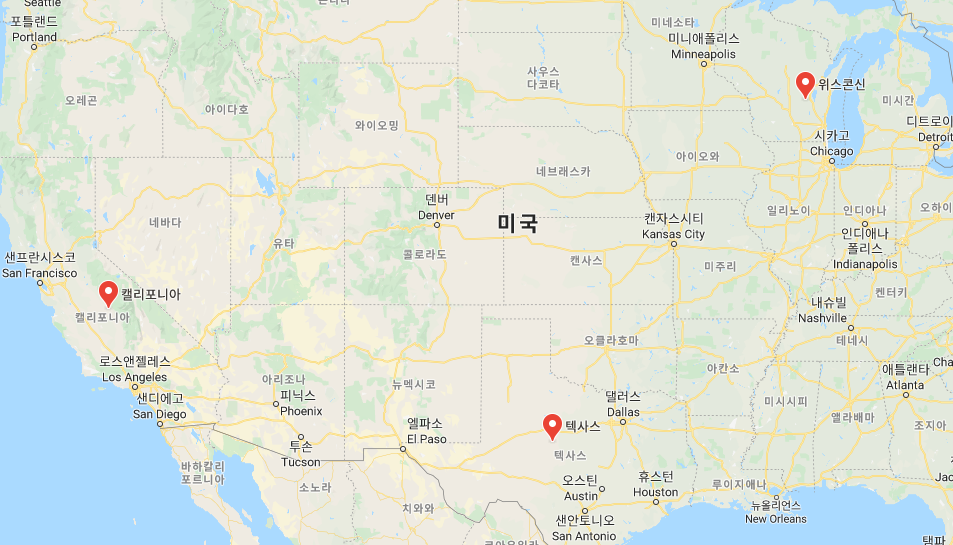

In [ ]:
display(train.tail())
display(calendar.tail())
display(sell.tail())
display(sample.tail())

# Question

## Do you sell different items by department?

In [ ]:
temp = sell.query("item_id in ('HOBBIES_1_001', 'HOBBIES_2_001') and store_id=='CA_1'")
sns.lineplot(x="wm_yr_wk", y="sell_price", hue="item_id", data=temp)
plt.show()

display(train.groupby("dept_id").item_id.size())

## Are all store selling the same item?

In [ ]:
train.groupby(["store_id", "cat_id", "dept_id"])["id", "item_id"].nunique()

## Item that have never been sold

In [ ]:
temp = train.melt(id_vars=["id"], 
                  var_name="d", value_name="sales")
temp = temp.merge(calendar[["d", "date"]], on="d")

_ = temp.groupby("id").sum()
sum(_.sales==0)

## Price information does not exist before sale

In [ ]:
sell.groupby(["item_id", "store_id"]).nunique()

## Is there a difference in statistics for each cat_id?

In [ ]:
temp = train.groupby(["cat_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().merge(calendar.loc[:, ["d", "date"]], 
                                left_on="index", right_on="d")
temp.date = pd.to_datetime(temp.date)

plt.figure(figsize=(30, 10))
for i in ["FOODS", "HOBBIES", "HOUSEHOLD"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
    plt.gca().xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)
plt.title("mean sales for each cat_id")
plt.show()

In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 1, 1)
plt.plot(temp["date"][1:], temp["FOODS"].diff()[1:], label="FOODS", alpha=.4)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.subplot(2, 1, 2)
for i in ["HOBBIES", "HOUSEHOLD"]:
    plt.plot(temp["date"][1:], temp[i].diff()[1:], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)
plt.show()

In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 1, 1)
plt.plot(temp["date"][1:], temp["FOODS"].diff()[1:], label="FOODS", alpha=.4)
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.subplot(2, 1, 2)
for i in ["HOBBIES", "HOUSEHOLD"]:
    plt.plot(temp["date"][1:], temp[i].diff()[1:], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)
plt.show()

In [ ]:
temp = train.groupby(["cat_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().melt(id_vars="index", value_vars=["FOODS", "HOBBIES", "HOUSEHOLD"])

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp, x="variable", y="value")
plt.show()

## Is there a difference in statistics for each dept_id?

In [ ]:
temp = train.groupby(["dept_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().merge(calendar.loc[:, ["d", "date"]], 
                                left_on="index", right_on="d")
temp.date = pd.to_datetime(temp.date)

plt.figure(figsize=(30, 30))
plt.subplot(3, 1, 1)
for i in ["FOODS_1", "FOODS_2", "FOODS_3"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.subplot(3, 1, 2)
for i in ["HOBBIES_1", "HOBBIES_2"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.subplot(3, 1, 3)
for i in ["HOUSEHOLD_1", "HOUSEHOLD_2"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.title("mean sales for each dept_id")
plt.show()

In [ ]:
temp = train.groupby(["dept_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().melt(id_vars="index", value_vars=list(temp.columns))

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp, x="variable", y="value")
plt.show()

## Is there a difference in statistics for each state_id?

In [ ]:
temp = train.groupby(["state_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().merge(calendar.loc[:, ["d", "date"]], 
                                left_on="index", right_on="d")
temp.date = pd.to_datetime(temp.date)

plt.figure(figsize=(30, 10))
for i in ["CA", "TX", "WI"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)
plt.title("mean sales for each state_id")
plt.show()

In [ ]:
temp = train.groupby(["state_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().melt(id_vars="index", value_vars=list(temp.columns))

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp, x="variable", y="value")
plt.show()

## Is there a difference in statistics for each store_id?

In [ ]:
temp = train.groupby(["store_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().merge(calendar.loc[:, ["d", "date"]], 
                                left_on="index", right_on="d")
temp.date = pd.to_datetime(temp.date)

plt.figure(figsize=(30, 30))
plt.subplot(3, 1, 1)
for i in ["CA_1", "CA_2", "CA_3", "CA_4"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.subplot(3, 1, 2)
for i in ["TX_1", "TX_2", "TX_3"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.subplot(3, 1, 3)
for i in ["WI_1", "WI_2", "WI_3"]:
    plt.plot(temp["date"], temp[i], label=i, alpha=.4)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.legend()
plt.xticks(rotation=45)
plt.margins(x=0.01)

plt.title("mean sales for each store_id")
plt.show()

In [ ]:
temp = train.groupby(["store_id"]).mean().T
temp.columns.name = None
temp = temp.reset_index().melt(id_vars="index", value_vars=list(temp.columns))

plt.figure(figsize=(20, 10))
sns.boxplot(data=temp, x="variable", y="value")
plt.show()

---
The end of notebook